# Relationship between susceptibility and self-demagnetization

### Import the required modules

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import get_cmap
from fatiando import mesher, utils
from fatiando.gravmag import triaxial_ellipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

### Randomly generated models

In [3]:
# isostropic susceptibility (in SI)
k = np.linspace(0.01, 1.0, 50)

# Ellipsoid semi-axes (in m)
a = 1000*np.random.rand()
b = a*np.random.rand()
c = b*np.random.rand()

# demagnetizing factors
n11, n22, n33 = triaxial_ellipsoid.demag_factors(a, b, c)

# orietation angles (in degrees)
strike = 180.
dip = 0.
rake = 0.

# auxiliary orientation angles (in radians)
alpha, gamma, delta = triaxial_ellipsoid.structural_angles(strike, dip, rake)

V = triaxial_ellipsoid.V(alpha, gamma, delta)

In [4]:
F = 25000. + 35000.*np.random.rand() # intensity (nT) of the local-geomagnetic field
inc = np.linspace(-90, 90, 181) # inclination (degrees)
dec = 360*np.random.rand() # declination (degrees)

### Observed maximum

In [5]:
thetas = []
for i in inc:

    # Local-geomagnetic field
    F_unit = utils.ang2vec(1, i, dec)
    
    # angular difference (in degrees) between the local-geomagnetic field
    # and the resultant magnetization
    theta = []

    for ki in k:
        K = ki*np.identity(3)
        mag = triaxial_ellipsoid.magnetization(n11, n22, n33, K, 
                                               F, i, dec, 0., 0., 0., V)
        
        mag_unit = mag/np.sqrt(mag[0]**2 + mag[1]**2 + mag[2]**2)
        
        theta.append(np.arccos(np.dot(F_unit, mag_unit)))
        
    theta = np.rad2deg(np.array(theta))
    thetas.append(theta)

In [6]:
imax = np.argmax(np.array(thetas), axis=0)

In [7]:
inc_max = inc[imax].max()

In [8]:
# Local-geomagnetic field
F_unit = utils.ang2vec(1, inc_max, dec)

# angular difference (in degrees) between the local-geomagnetic field
# and the resultant magnetization
theta_max = []
for ki in k:
    K = ki*np.identity(3)
    mag = triaxial_ellipsoid.magnetization(n11, n22, n33, K, 
                                           F, inc_max, dec, 0., 0., 0., V)
    
    mag_unit = mag/np.sqrt(mag[0]**2 + mag[1]**2 + mag[2]**2)
    
    theta_max.append(np.arccos(np.dot(F_unit, mag_unit)))
    
theta_max = np.rad2deg(np.array(theta_max))

### Empirical maximum

In [9]:
inc_theor = 45.

# Local-geomagnetic field
F_unit = utils.ang2vec(1, inc_theor, dec)

# angular difference (in degrees) between the local-geomagnetic field
# and the resultant magnetization
theta_max_theor = []
for ki in k:
    K = ki*np.identity(3)
    mag = triaxial_ellipsoid.magnetization(n11, n22, n33, K, 
                                           F, inc_theor, dec, 0., 0., 0., V)
    
    mag_unit = mag/np.sqrt(mag[0]**2 + mag[1]**2 + mag[2]**2)
    
    theta_max_theor.append(np.arccos(np.dot(F_unit, mag_unit)))
    
theta_max_theor = np.rad2deg(np.array(theta_max_theor))

### Theoretical maximum

In [24]:
aux = np.sqrt((1 - k*n33)/(1 - k*n11))
theta_max_theor2 = np.rad2deg(np.arccos(aux))

inc max = 43.00000
D = 325.90341
a = 611.86341
b = 585.17505
c = 41.33544


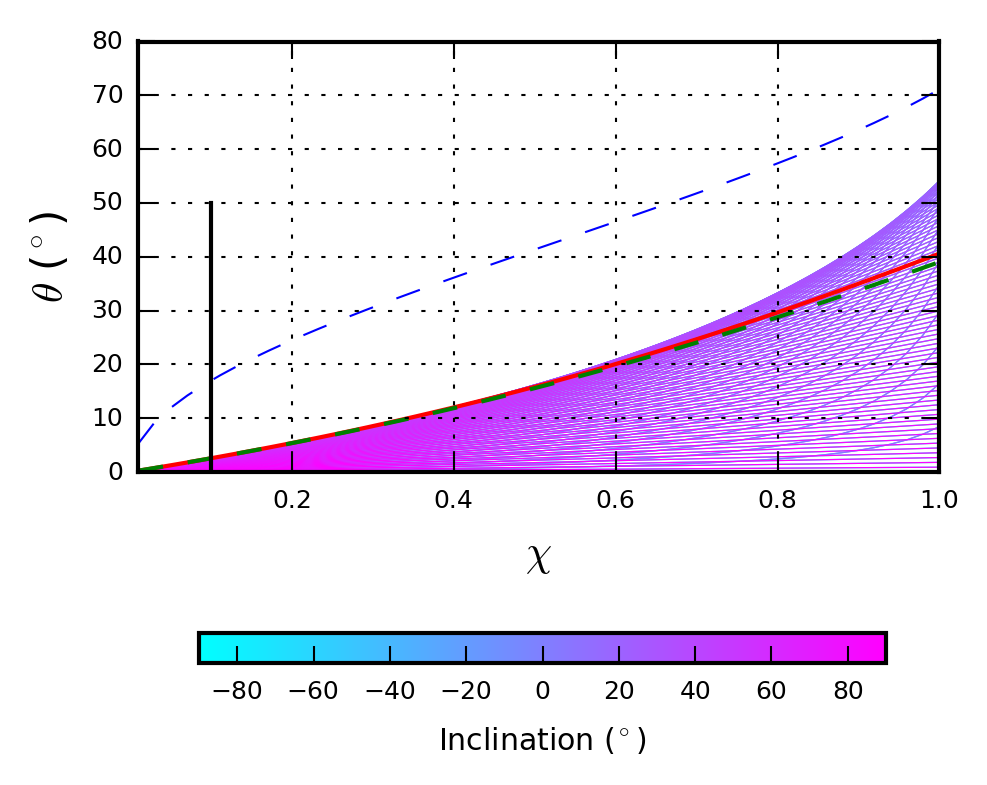

In [25]:
print 'inc max = %.5f' % inc_max
print 'D = %.5f' % dec
print 'a = %.5f' % a
print 'b = %.5f' % b
print 'c = %.5f' % c

# Set the line colors
colors = get_cmap('cool')
cl = np.linspace(0, 1, inc.size)

fig = plt.figure(figsize=(3.27, 2))

for i, cli in enumerate(cl):
    plt.plot(k, thetas[i], linestyle='-',
             color=colors(cli), linewidth=0.3)

plt.plot(k, theta_max, '-r', linewidth=1)
plt.plot(k, theta_max_theor, '--g', linewidth=1)
plt.plot(k, theta_max_theor2, '--b', linewidth=0.5)

plt.plot([0.1, 0.1], [0., 50.], '-k')
plt.ylabel('$\\theta$ ($^{\circ}$)', fontsize=10)
plt.xlabel('$\chi$', fontsize=10)
plt.xlim(k.min(), k.max())
#plt.ylim(0, 30)
plt.grid()

norm = Normalize(vmin = inc.min(), vmax = inc.max())
ax = fig.add_axes([0.2, -0.1, 0.7, 0.05], adjustable='datalim')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'horizontal')
cb.set_label('Inclination ($^{\circ}$)')

plt.tight_layout()
#plt.savefig('..\\manuscript\\figures\\susceptibility.pdf', facecolor='w', bbox_inches='tight')
plt.show()